## Bending Slenderness (Biegeschlankheitskriterien) complying with EC2
based on the report (DAfStb Unterausschuss Nichtmetallische Bewehrung - Herleitung von Biegeschlankheitskriterien)
that originates from the PhD:
El Ghadioui, Redouan: „Bemessung carbonbewehrter Betonbauteile unter besonderer Betrachtung des
Gebrauchszustandes - Entwicklung eines Modells zur wirklichkeitsnahen Verformungsberechnung“,
Technische Universität Darmstadt, Dissertation, 2020
![image.png](attachment:image.png)
(Red part is implemented in this notebook)

In [1]:
import numpy as np
import sympy as sp
from sympy import symbols

In [2]:
eps_cs, eps_cd, eps_ca, beta_ds_t_t_s, k_h, eps_cd0, t, t_s, h_0, A_c, u, alpha_ds1, alpha_ds2, f_cm, f_cmo, beta_RH, RH, RH_0, beta_as_t, eps_ca_infty, f_ck, kappa_cs, alpha_e, E_s, E_c_eff, E_cm, phi, S, I= symbols(r'\varepsilon_{cs}, \varepsilon_{cd}, \varepsilon_{ca}, \beta_{ds}{(t_ts)}, k_h, \varepsilon_{cd0}, t, t_s, h_0, A_c, u, \alpha_{ds1}, \alpha_{ds2}, f_{cm}, f_{cmo}, \beta_{RH}, RH, RH_0,  \beta_{as}{(t)}, \varepsilon_{ca}{(\infty)}, f_{ck}, \kappa_{cs}, \alpha_{e}, E_s, E_{c_eff}, E_{cm}, \varphi, S, I', real=True, nonnegative=True)

$$ E_{c,eff} = \frac{E_{cm}}{1 + \varphi_{eq} (\infty,t_0)}$$

In [3]:
E_cm = 35000; phi_eq = 1.6
E_c_eff = E_cm / (1 + phi_eq)
E_c_eff

13461.538461538461

$$h_0 = 2A_c/u$$

In [4]:
A_c = 1000 * 300
u = 2 * 1300
h_0 = 2 * A_c / u

$$\alpha_1 = \left[\frac{35}{f_{cm}} \right]^{0.7} \hspace{1cm} \alpha_2 = \left[\frac{35}{f_{cm}} \right]^{0.2} \hspace{1cm} \alpha_3 = \left[\frac{35}{f_{cm}} \right]^{0.5} $$

In [5]:
f_cm = 30
alpha1 = (35/f_cm)**0.7
alpha2 = (35/f_cm)**0.2
alpha3 = (35/f_cm)**0.5
alpha1, alpha2, alpha3

(1.1139424459794183, 1.031310306477545, 1.0801234497346435)

$$ \varphi_{RH} = 1 + \frac{1 - RH/100}{0.1 . \sqrt[3]{h_0}} \hspace{2cm} for f_{cm} \leq 35 MPa$$

$$ \varphi_{RH} = \left[1 + \frac{1 - RH/100}{0.1 . \sqrt[3]{h_0}} . \alpha_1\right] . \alpha_2 \hspace{2cm} for f_{cm} > 35 MPa$$

In [6]:
RH = 70
phi_RH = sp.Piecewise((1 + (1-RH/100)/(0.1 * h_0**(1/3)), f_cm <= 35),
                      ((1 + ((1-RH/100)/(0.1 * h_0**(1/3))) * alpha1) * alpha2, f_cm > 35))
phi_RH

1.48909732465087

$$ \beta{(f_{cm})} = \frac{16.8}{\sqrt{f_{cm}}} $$

In [7]:
beta_fcm = 16.8 / f_cm**0.5
beta_fcm

3.0672463220289305

$$ \beta{(t_{0})} = \frac{1}{0.1 + t_0^{0.20}} $$

In [8]:
t_s = 3
t = 100000000
t_0 = 10
t_1 = 60
t_3 = 365

In [9]:
beta_t0 = 1 / (0.1 + t_0**0.20)
beta_t0

0.593509431027676

$$ \beta_H = 1.5 [ 1 + (0.012 RH)^{18}] h_0 + 250 \leq 1500 \hspace{2cm} for f_{cm} \leq 35 $$

$$ \beta_H = 1.5 [ 1 + (0.012 RH)^{18}] h_0 + 250 \alpha_3 \leq 1500 \alpha_3 \hspace{2cm} for f_{cm} \leq 35 $$

In [10]:
beta_H = sp.Piecewise((1.5*(1 + 0.012*RH)**18 * h_0 + 250, f_cm <=35),
                     (1.5*(1 + 0.012*RH)**18 * h_0 + 250 * alpha3, f_cm > 35))
beta_H

20229974.8400678

$$ \beta_c (t,t_0) = \left[ \frac{(t - t_0)}{(\beta_H + t - t_0)} \right]^{0.3} $$

$$ \varphi_0 = \varphi_{RH} . \beta{(f_{cm})} . \beta{(t_{0})} $$

In [11]:
phi_0 = phi_RH * beta_fcm * beta_t0
phi_0

2.71081176695058

In [12]:
beta_ctt0 = ((t-t_0)/(beta_H + t - t_0))** 0.3
beta_ctt0

0.946228818679258

ANNEX B (Informative)
Creep and shrinkage strain
B.1 Basic equations for determining the creep coefficient
(1) The creep coefficient qJ(t,ta} may be calculated from:

$$ \varphi(t,t_0) = \varphi_0 . \beta_c (t,t_0) $$

In [13]:
phi_tt0 = phi_0 * beta_ctt0
phi_tt0

2.56504821590348

- Beanspruchungen

Eigenlast gk 36 % der gesamten charakteristischen Last pk

Ausbaulast Δgk 24 % der gesamten charakterischen Last pk

Nutzlast ψ2 ∙ qk 0,3 ∙ 40 % der gesamten charakteristischen Last pk

Bemessungslast GZT 1,35 ∙ (36 % + 24 %) + 1,5 ∙ 40 % = 141 %

Quasi-ständige Last GZG 36 % + 24 % + 0,3 ∙ 40 % = 72 %

Verhältnis GZG / GZT 72 / 141 = 51 %
- Relative Luftfeuchtigkeit
RH = 70 %
- Zeitpunkte
Dauer der Nachbehandlung: ts = 3 Tage

Eigenlast gk: t0 = 10 Tage

Ausbaulast Δgk: t1 = 60 Tage

Nutzlasten qk+Δqk: t2 = 365 Tage

$$ \varphi_{eq}(\infty,t_0) = \frac{\varphi(\infty,t_0).g_k +\varphi(\infty,t_1).\Delta g_k + \varphi(\infty,t_2) . \sum {\psi_{2,i}} . q_{k,i}} {g_k + \Delta g_k + \sum {\psi_{2,i}} . q_{k,i} }$$

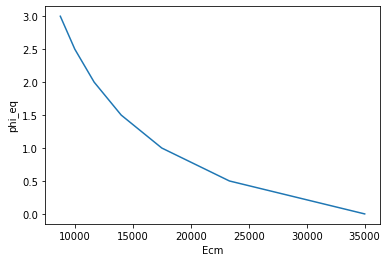

In [14]:
phi_eq = (0, .5, 1, 1.5 , 2, 2.5, 3)
E_c_eff = E_cm / (np.ones_like(phi_eq) + phi_eq)

import matplotlib.pyplot as plt 
plt.plot(E_c_eff, phi_eq)
plt.xlabel('Ecm')
plt.ylabel('phi_eq')
plt.show()

In [15]:
phi_t0 = 1 
phi_t1 = 2
phi_t2 = 3

g_k = 0.36
Delta_gk = 0.24
psi_2i = 0.3
q_ki = 0.40
E_cm = 35000
phi_eq = (phi_t0 * g_k + phi_t1 * Delta_gk + phi_t2* psi_2i * q_ki) / (g_k + Delta_gk + psi_2i * q_ki)
E_c_eff = E_cm / (1 + phi_eq)
phi_eq

1.6666666666666667

In [16]:
eta = 0.51 # = GZG / GZT

In [17]:
L = 6000
f_ck = 30
f_cd = 0.85 * f_cm / 1.5
M_Ed = 20
b = 1000
h = 300
d_2 = 80 #cover
d = h - d_2
mu_Ed = M_Ed / (b*d**2*f_cd)
mu_Ed

2.4307243558580458e-08

In [18]:
eps_fud = 2
mu_Ed_bal = 0.8095 * 3.5 / (3.5 + eps_fud) * (1 - 0.416 * 3.5 / (3.5 + eps_fud))
mu_Ed_bal

0.37876571900826445

In [19]:
A_sf1 = 5.02 * 100 
A_sf2 = 5.02 * 100
E_sf = 200000
rho_1I = A_sf1 / (b * h)
rho_2I = A_sf2 / (b * h)
alpha_e = E_sf / E_c_eff
B_I = (alpha_e - 1) * (rho_1I + rho_2I)
A_I = B_I/h * (d + d_2)
k_xI = (0.5 + A_I)/(1 + B_I)
x_I = k_xI * h
z_sf1 = d - x_I
z_sf2 = d - d_2 - z_sf1

k_I = 1 + 12 * ( 0.5 - k_xI)**2\
    + 12 * (alpha_e - 1) * rho_1I * (d/h - k_xI)**2\
    + 12 * (alpha_e - 1) * rho_1I * A_sf2/A_sf1 * (k_xI - d_2/h)**2
I_I = k_I * b * h**3 / 12

S_I = A_sf1 * z_sf1 + A_sf2 * z_sf2 # z_sf2 < 0

In [20]:
import numpy as np 

rho_1II = A_sf1 / (b * h)
rho_2II = A_sf2 / (b * h)
alpha_e = E_sf / E_c_eff
A_II = alpha_e * (rho_1II + rho_2II)
k_xII = -A_II + np.sqrt(A_II ** 2 + 2 * alpha_e * (rho_1II + rho_2II * d_2 / d))
x_II = k_xII * d
z_sf1 = d - x_II
z_sf2 = d - d_2 - z_sf1

k_II = 4 * k_xII**3\
    + 12 * alpha_e * rho_1II * (1 - k_xII)**2\
    + 12 * alpha_e * rho_1II * A_sf2/A_sf1 * (k_xII - d_2/d)**2
I_II = k_II * b * d**3 / 12

S_II = A_sf1 * z_sf1 + A_sf2 * z_sf2 # z_sf2 < 0

$$ \frac{w_m}{L} = \frac{5}{4} . \frac{\eta . \mu_{Ed} . f_{cd}}{E_{c,eff}} . \frac{L}{d} .\left( \frac{\xi}{k_{\mathrm{II}}} + \frac{(1-\xi)}{k_{\mathrm{I}} . (h/d)^3} \right) + Schwinden $$

In [21]:
M_Ed = 100e6 # TODO: calculate this according to El Ghadioui 2020 PhD
import sympy as sp
f_ctm = sp.Piecewise(
                                (0.3*f_ck**(2/3), f_ck < 50),
                                ((2.12*np.log((1+(f_ck+8)/10))), f_ck >= 50)
            )
M_cr = f_ctm * I_I / x_I 
beta = 1 # one-time, short-term stressing; = 0.5 for permanent, repeated stressing
xi = 1 - beta * (M_cr / M_Ed) **2
w_m = (5/4) * (eta * mu_Ed * f_cd / E_c_eff) * (L / d) * (xi/k_II + (1-xi) / (k_I * (h/d)**3)) * L
M_cr, M_Ed, w_m

(43120815.0779654, 100000000.0, 1.16070812063613e-5)